# Predict Helpfulness of Customer Reviews - Yelp Data v14.0

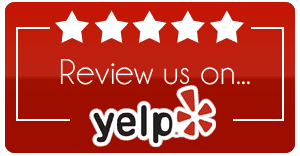

# Table Of Contents

__Part I__
1. [Customer Reviews and eWOM](#Customer-Reviews-and-eWOM)
2. [Why to Predict Helpfulness?](#Why-Helpfulness-matters?)

__Part II__
4. [Introduction to Yelp Data](#Introduction-to-Yelp-Data)
5. [Read & Process Data](#Read-&-Process-Data)
  
    5.1. [Reviews Data](#Reviews-Data)
  
    5.2. [Business Data](#Business-Data)

    5.2.1. [Cleaning the Business Data](#Cleaning-the-Business-Data)

    5.2.2. [Examples of Business Attributes](#Examples-of-Business-Attributes)

    5.2.3. [Exploring Business Attributes](#Exploring-Business-Attributes)

    5.3. [Read Users Data](#Read-User-Data)


__Part III__
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    6.1. [Distribution of Useful, Funny, and Cool Reviews](#Distribution-of-Useful,-Funny,-and-Cool-Reviews)

    6.2. [Distribution of Reviews by Year and Month](#Distribution-of-Reviews-by-Year-and-Month)

    6.3. [Top 10 Users with the Most Reviews](#Top-10-Users-with-the-Most-Reviews)

    6.4. [Top 10 Businesses with the Most Reviews](#Top-10-Businesses-with-the-Most-Reviews)

    6.5. [Distribution of Star Ratings](#Distribution-of-Star-Ratings)

    6.6. [Distribution of Useful Reviews](#Distribution-of-Useful-Reviews)

    6.7. [Example of Most Useful, Funniest and Coolest Reviews](#Example-of-Most-Useful,-Funnies,-and-Coolest-Reviews)

7. [Linguistic Features](#Linguistic-Features)

__Part IV__
8. Analysis

__Conclusion__
Results

# Customer Reviews and eWOM

  Online customer reviews can be defined as comments or opinions on a specific product which are posted on company or a third-party website by the peers ([Mudambi and Schuff, 2010](https://www.jstor.org/stable/20721420?seq=1)). Moreover, they can be seen as an outcome of a customer’s experience with a product, as well as, an input for a potential customer’s buying process. For this reason, customer reviews should not be considered as a narrow two-way relationship between the customer and the brand but they may result a greater effect on the business performance by affecting potential customers.

  The consumer buying process consists of the following steps: problem recognition, information search, evaluation of alternatives, purchase decision and postpurchase behavior ([Kotler and Keller, 2016](https://www.pearson.com/us/higher-education/product/Kotler-Marketing-Management-15th-Edition/9780133856460.html?tab=overview)). Consumers may not go through each step anytime they purchase a product. However, depending on the importance of the purchase, prior experience etc., they will go through several steps in the process including information search and postpurchase behavior. Accordingly, customer reviews will be one of the main sources of collecting information for the potential buyers and an important medium for the customers who would like to share their experiences with the product and purchasing process.

  On the other hand, in the information search process, customers would like to access word-of-mouth (WOM) in order to mitigate uncertainty and perceived risk ([Xie etc., 2014](https://www.sciencedirect.com/science/article/abs/pii/S027843191400125X)). In the traditional way, WOM is done by contacting friends, peers, people who have experience with the product etc. However, as e-commerce being prevalent, online customer reviews can be considered as a part of WOM and can be defined as eWOM (electronic word-of-mouth ([Bronner and Hoog, 2010](https://journals.sagepub.com/doi/abs/10.1177/0047287509355324)). 


# Why to Predict Helpfulness?


As discussed in the above section, customer reviews are one of the main source of information for potential buyers on the internet. However, a company have to do more than just presenting the customer reviews to the potential buyers. As the number of customer reviews grows, the amount of resources that potential buyers have to allocate in order to complete the purchasing process also grows. Moreover, low-quality reviews can change the mind of potential buyer and can cause a loss of business relationships. For this reason, it is essential for a business to select and present helpful reviews in order to build and sustain profitable relationships with customers ([Park, 2018](https://www.mdpi.com/2071-1050/10/6/1735)).

For example, [Amazon](https://www.amazon.com), orders the customer reviews based on their helpfulness and ask each reader to vote if the review was helpful. It is possible to determine the helpfulness of customer reviews manually by other customers. However, this kind of an approach comes with its own caveats. Firstly, potential buyers and/or consumers mostly will not be able to spend the required amount of time to read all customer reviews and vote them. Secondly, most of reviews will not be voted (as we will see in the [Yelp](https://www.yelp.com/dataset) dataset, .. % have less than 5 votes). Last but not least, the amount of time that is spent for a review to be recognized as helpful can vary greatly and can cause loss of potential business relationships.

As a result, predicting helpfulness of customer reviews gives business the control over the customer reviews by promoting the most possible helpful review as the review enters the pool of reviews. It is also convenient for the potential buyers since it reduces the search for material information about the product significantly. Finally, it increases the efficiency of the dataset by going through each customer reviews instead of focusing a narrow number of reviews.

# Introduction to YELP data

[Yelp](https://www.yelp.com/dataset) dataset consists of six `json` files `business.json`, `review.json`, `user.json`, `checkin.json`, `tip.json` and `photo.json`. 

* `business.json` has information about the business such as name, location, attributes, business hours etc.

* `review.json` has information about each review in the dataset such as who published the reviews, star rating, review corpus, useful votes etc.

* `user.json` has information about each user in the dataset such as name, number of reviews, friends, average star rating etc.

* `checkin.json` has information about business checkins such as business id and date.

* `tip.json` (tips are shorter version of reviews and conveys quick suggestions to businesses) has information such as tip corpus, compliment count, date etc.

* `photo.json` includes photo data such as photo id, photo label etc.

The detailed information and full list of features for each file in the dataset can be reached from the [documentation](https://www.yelp.com/dataset).

In this research, we are mainly insterested in `review.json`, `user.json` and `business.json`. However, there may be use of other files in the dataset.




# Read & Process Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reviews Data

* While reading the `yelp_academic_dataset_review.json` file, I could have used `pd.read_json()` or `json.loads()` in order to load the data. However, both approaches result `MemoryError` due to the limited `RAM (Random Access Memory)` capacity. In order to overcome this issue, I read `json` file with `.readlines()` method and write the attributes into a dictionary. Later on, I transformed the dictionary into a dataframe using `pd.DataFrame()`.

In [3]:
# attributes of review.json file
# can be reached at https://www.yelp.com/dataset/documentation/main
columns = ['review_id', 'user_id', 'business_id', 'stars',
           'useful', 'funny', 'cool', 'text', 'date']
df_reviews = {}
for column in columns:
    df_reviews.setdefault(column, [])
with open('/content/drive/My Drive/yelp/yelp_academic_dataset_review.json') as fin:
    for line in fin.readlines():
        data = json.loads(line)
        for k, v in data.items():
            df_reviews[k].append(v)

The features in `reviews.json` file

* `review_id`: (`str`) unique id of the review

* `user_id`: (`str`) unique id of the user

* `business_id`: (`str`) unique id of the business

* `stars`: (`int`) star rating

* `date`: (`str`) date formatted `YYYY-MM-DD`

* `text`: (`str`) the review itself

* `useful`: (`int`) number of useful votes received

* `funny`: (`int`) number of funny votes received

* `cool`: (`int`) number of cool votes received

In [4]:
df_reviews = pd.DataFrame(df_reviews)
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [5]:
df_reviews['is_useful'] = np.where(df_reviews.useful != 0, 1, 0)
df_reviews['is_funny'] = np.where(df_reviews.funny != 0, 1, 0)
df_reviews['is_cool'] = np.where(df_reviews.cool != 0, 1, 0)
df_reviews.date = pd.to_datetime(df_reviews.date)
df_reviews['years'] = [date.year for date in df_reviews.date]
df_reviews['months'] = [date.month for date in df_reviews.date]
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,is_useful,is_funny,is_cool,years,months
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1,0,0,2015,4
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52,1,1,0,2013,12
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1,0,0,2015,12
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,0,0,0,2011,5
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,0,0,0,2017,1


In [6]:
# check the size of `df_reviews` in the system
import sys
print('The size of df_reviews is ', end='')
print('{:.2f}'.format(sys.getsizeof(df_reviews) / 1073741824) + " GB")

The size of df_reviews is 7.23 GB


## Read Business Data


The features in `business.json` file

* `business_id`: (`str`) unique id of the business

* `name`: (`str)` the business' name

* `address`: (`str`) the full address of the business

* `city`: (`str`) the city where the business is located

* `state`: (`str`) the state where the business is located

* `postal code`: (`str`) the postal code of the business

* `latitude`: (`float`) latitude

* `longitude`: (`float`) longitude

* `stars`: (`float`) average star rating, rounded to half-stars

* `review_count`: (`str`) total number of reviews given to the business

* `is_open`: (`int`) (binary) indicates whether the business is still open

* `attributes`: (`json`) attributes of the business

* `categories`: (`list`) description of the business

* `hours`: (`json`) the working hours of the business

In [7]:
df_business = pd.read_json('/content/drive/My Drive/yelp/yelp_academic_dataset_business.json',
                           lines=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [8]:
# check the size of `df_business` in the system
print('The size of df_business is ', end='')
print('{:.2f}'.format(sys.getsizeof(df_business) / 1073741824) + " GB")

The size of df_business is 0.23 GB


### Cleaning the Business Data

In [9]:
def clean_json(text): # cleans a JSON object if it has structural problems
    if not isinstance(text, str):
        text = str(text)
    text = text.replace('True', '"True"')
    text = text.replace('False', '"False"')
    text = text.replace("'", '"')
    text = text.replace('None', '"False"')
    text = text.replace('"DriveThr', '"DriveThr"')
    text = text.replace('""', '"')
    text = text.replace('u"', '')
    text = text.replace('"{', '{').replace('}"', '}')
    return text

def get_degree(d): # if a JSON object then gives the degree of nestedness
    if isinstance(d, dict):
        i = 1
        for k, v in d.items():
            if isinstance(v, dict):
                i += 1
                get_degree(v)
        return i
    return 0

def print_key_value(text, indent=0):
    """Prints key and value pair of a JSON object. If a nested JSON object, then
    nested values are indented"""
    if not isinstance(text, dict):
        try:
            text = json.loads(text)
        except:
            return
    for k, v in text.items():
        if isinstance(v, dict):
            print('\t' * indent + str(k) + ':')
            iterate = indent + 1
            print_key_value(v, iterate)
        else:
            print('\t' * indent + str(k) + ' --> ' + str(v))

def make_json(text): # transforms a string object into a JSON object
    return json.loads(text)

def extract_attributes(text: str, container: dict) -> dict:
    """Extract each business attribute from attributes feature"""
    if not isinstance(text, dict):
        try:
            text = json.loads(text)
        except:
            return
    for k, v in text.items():
        container[k] = container.get(k, 0) + 1
        if isinstance(v, dict):
            d = {str(k) + '.' + str(kk) : vv for kk, vv in v.items()}
            extract_attributes(d, container)

In [10]:
# some attributes have structural problems that does not let to read them as
# json objects.
# clean the attributes and converts them into json objects
df_business.attributes = df_business.attributes.astype(str).apply(clean_json)
df_business.attributes = df_business.attributes.apply(make_json)

### Examples of Business Attributes

In [11]:
# find the degree of nestedness of each json object in the business attributes
nested_degree = [get_degree(d) for d in df_business.attributes.values]

In [12]:
# one of the shortest json - only the json object itself
print_key_value(list(df_business.attributes.values)[
                                 nested_degree.index(1)])

GoodForKids --> True
ByAppointmentOnly --> True


In [13]:
# one of the longest json - json object and its childs
print_key_value(list(df_business.attributes.values)[
                                 nested_degree.index(max(nested_degree))])

BusinessParking:
	garage --> False
	street --> False
	validated --> False
	lot --> True
	valet --> False
Music:
	dj --> False
GoodForDancing --> False
HasTV --> True
RestaurantsTakeOut --> True
Smoking --> no
WheelchairAccessible --> True
Alcohol --> beer_and_wine
GoodForKids --> True
ByAppointmentOnly --> False
CoatCheck --> False
OutdoorSeating --> False
BestNights:
	monday --> False
	tuesday --> False
	friday --> True
	wednesday --> False
	thursday --> False
	sunday --> False
	saturday --> False
DogsAllowed --> False
DietaryRestrictions:
	dairy-free --> False
	gluten-free --> False
	vegan --> True
	kosher --> False
	halal --> False
	soy-free --> False
	vegetarian --> False
BusinessAcceptsCreditCards --> True
BikeParking --> True
RestaurantsTableService --> True
RestaurantsReservations --> True
WiFi --> free
RestaurantsPriceRange2 --> 2
HappyHour --> False
NoiseLevel --> average
RestaurantsAttire --> casual
RestaurantsGoodForGroups --> True
Ambience:
	touristy --> False
	hipster --> 

### Exploring Business Attributes

In [14]:
d_attributes = {}
for val in df_business.attributes.values:
  extract_attributes(val, d_attributes)

In [15]:
# full list of attributes
', '.join(list(d_attributes.keys()))

'BusinessAcceptsCreditCards, BikeParking, GoodForKids, BusinessParking, BusinessParking.garage, BusinessParking.street, BusinessParking.validated, BusinessParking.lot, BusinessParking.valet, ByAppointmentOnly, RestaurantsPriceRange2, DogsAllowed, WiFi, RestaurantsAttire, RestaurantsTakeOut, NoiseLevel, RestaurantsReservations, RestaurantsGoodForGroups, HasTV, Alcohol, RestaurantsDelivery, OutdoorSeating, Caters, WheelchairAccessible, AcceptsInsurance, RestaurantsTableService, Ambience, Ambience.touristy, Ambience.hipster, Ambience.romantic, Ambience.intimate, Ambience.trendy, Ambience.upscale, Ambience.classy, Ambience.casual, GoodForMeal, GoodForMeal.dessert, GoodForMeal.latenight, GoodForMeal.lunch, GoodForMeal.dinner, GoodForMeal.brunch, GoodForMeal.breakfast, HappyHour, Ambience.divey, BusinessAcceptsBitcoin, BYOB, Corkage, GoodForDancing, CoatCheck, BestNights, BestNights.monday, BestNights.tuesday, BestNights.friday, BestNights.wednesday, BestNights.thursday, BestNights.sunday, B

In [16]:
t = [(k, v) for k, v in d_attributes.items()]
df_attr_counts = pd.DataFrame({'attribute' : [k for k, v in t],
                               '#_of_business' : [v for k, v in t],
                               '%_missing': 1 - (np.array(
                                   [v for k, v in t]) / df_business.shape[0])})
df_attr_counts.sort_values('%_missing', ascending=True, inplace=True)
df_attr_counts.reset_index(drop=True, inplace=True)
with pd.option_context('display.max_rows', 100):
    display(df_attr_counts)

,attribute,#_of_business,%_missing
0,BusinessAcceptsCreditCards,122237,0.416232
1,BusinessParking,115215,0.449767
2,BusinessParking.garage,112215,0.464094
3,BusinessParking.valet,112203,0.464151
4,BusinessParking.lot,112198,0.464175
5,BusinessParking.street,112198,0.464175
6,BusinessParking.validated,112196,0.464185
7,RestaurantsPriceRange2,111288,0.468521
8,BikeParking,89765,0.571308
9,GoodForKids,68535,0.672697


## Read User Data

In [17]:
# attributes of user.json file
# can be reached at https://www.yelp.com/dataset/documentation/main
columns = ["user_id", "name", "review_count", "yelping_since", "friends",
           "useful", "funny", "cool", "fans", "elite", "average_stars",
           "compliment_hot", "compliment_more", "compliment_profile",
           "compliment_cute", "compliment_list", "compliment_note", 
           "compliment_plain", "compliment_cool", "compliment_funny",
           "compliment_writer", "compliment_photos"]
df_users = {}
for column in columns:
    df_users.setdefault(column, [])
with open('/content/drive/My Drive/yelp/yelp_academic_dataset_user.json') as fin:
    for line in fin.readlines():
      data = json.loads(line)
      for k, v in data.items():
        df_users[k].append(v)

The features in `user.json` file

* `user_id`: (`str`) unique id of the user

* `name`: (`str`) user's first name

* `review_count`: (`int`) total number of reviews of the user

* `yelping_since`: (`str`) when the user joined Yelp, formatted `YYYY-MM-DD`

* `friends`: (`list`) list of user's friends as `user_id`s

* `useful`: (`int`) number of `useful` votes sent by the user

* `funny`: (`int`) number of `funny` votes sent by the user

* `cool`: (`int`) number of `cool` votes sent by the user

* `fans`: (`int`) number of fans the user has

* `elite`: (`list`) list of the years the user was elite

* `average_stars`: (`float`) average star rating of all reviews of the user

* `compliment_hot`: (`int`) number of hot compliments recieved by the user

* `compliment_more`: (`int`) number of more compliments received by the user

* `compliment_profile`: (`int`) number of profile compliments received by the user

* `compliment_cute`: (`int`) number of cute compliments received by the user

* `compliment_list`: (`int`) number of list compliments received by the user

* `compliment_note`: (`int`) number of note compliments received by the user

* `compliment_plain`: (`int`) number of plain compliments received by the user

* `compliment_cool`: (`int`) number of cool compliments received by the user

* `compliment_funny`: (`int`) number of funny compliments received by the user

* `compliment_writer`: (`int`) number of writer compliments received by the user

* `compliment_photos`: (`int`) number of photo compliments received by the user

In [18]:
df_users = pd.DataFrame(df_users)
df_users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",628,225,227,14,,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",790,316,400,27,"2008,2009,2010,2011,2012,2013",3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",151,125,103,5,2010,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",233,160,84,6,2009,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",1265,400,512,78,"2009,2010,2011,2012,2014,2015,2016,2017,2018",4.37,8,9,2,1,1,22,28,31,31,19,31


In [19]:
# check the size of `df_reviews` in the system
print('The size of df_users is ', end='')
print('{:.2f}'.format(sys.getsizeof(df_users) / 1073741824) + " GB")

The size of df_users is 3.14 GB


# Exploratory Data Analysis

In [20]:
round(df_reviews.describe(), 2)

,stars,useful,funny,cool,is_useful,is_funny,is_cool,years,months
count,8021122.00,8021122.00,8021122.00,8021122.00,8021122.00,8021122.0,8021122.00,8021122.00,8021122.00
mean,3.70,1.32,0.46,0.57,0.46,0.2,0.24,2015.77,6.49
std,1.49,3.55,2.19,2.48,0.50,0.4,0.43,2.65,3.35
min,1.00,-1.00,0.00,-1.00,0.00,0.0,0.00,2004.00,1.00
25%,3.00,0.00,0.00,0.00,0.00,0.0,0.00,2014.00,4.00
50%,4.00,0.00,0.00,0.00,0.00,0.0,0.00,2016.00,7.00
75%,5.00,1.00,0.00,0.00,1.00,0.0,0.00,2018.00,9.00
max,5.00,1122.00,976.00,502.00,1.00,1.0,1.00,2019.00,12.00


In [21]:
# check the -1 values in useful and cool features
df_reviews[df_reviews.useful == -1]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,is_useful,is_funny,is_cool,years,months
6543215,hx5oI9l2xXwZMqyoiMXbeg,S7oukZE-NH_33uuWuR47LQ,ohEnmKpF7i2_ujme1p_vUQ,5.0,-1,0,-1,Cornish Pasty saved our Mothers Day! After hav...,2017-05-15 04:12:55,1,0,1,2017,5


In [22]:
# there are a few points needs correction (data points -1 scores)
df_reviews.useful.replace(to_replace=[-1], value=[0], inplace=True)
df_reviews.cool.replace(to_replace=[-1], value=[0], inplace=True)

## Distribution of Useful, Funny, and Cool Reviews

In [60]:
temp = pd.concat([df_reviews.groupby('is_useful').size().to_frame(name='#_of_useful'),
                  df_reviews.groupby('is_funny').size().to_frame(name='#_of_funny'),
                  df_reviews.groupby('is_cool').size().to_frame(name='#_of_cool')],
                 axis=1)
temp['%_useful'] = temp['#_of_useful'].apply(lambda x: x / df_reviews.shape[0])
temp['%_funny'] = temp['#_of_funny'].apply(lambda x: x / df_reviews.shape[0])
temp['%_cool'] = temp['#_of_cool'].apply(lambda x: x / df_reviews.shape[0])
temp.index = ['not', 'is']
temp = temp[['#_of_useful', '%_useful', '#_of_funny', '%_funny', '#_of_cool', '%_cool']]
display(temp)

,#_of_useful,%_useful,#_of_funny,%_funny,#_of_cool,%_cool
not,4337407,0.540748,6419321,0.800302,6056599,0.755081
is,3683715,0.459252,1601801,0.199698,1964523,0.244919


## Distribution of Reviews by Year and Month


In [63]:
# get frequency of each year and month
from collections import Counter
year_counts = Counter(df_reviews.years)
years = sorted([year for year in year_counts])
year_counts = [year_counts[year] for year in years]
month_counts = Counter(df_reviews.months)
months = sorted([month for month in month_counts])
month_counts = [month_counts[month] for month in months]

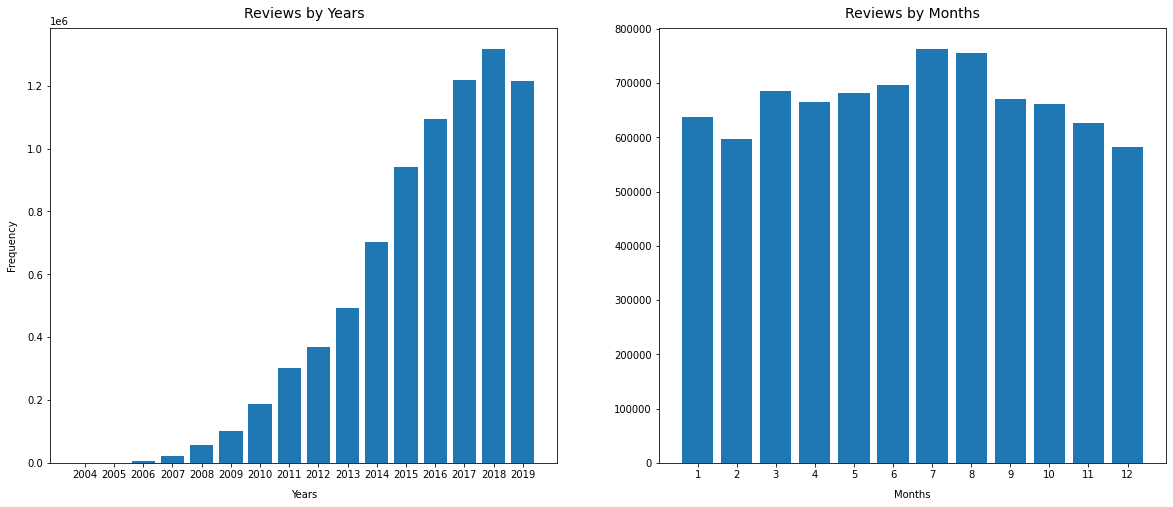

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes = axes.flatten()
axes[0].bar(years, year_counts)
axes[0].set_xlabel('Years', labelpad=10)
axes[0].set_xticks(range(2004, 2020))
axes[0].set_xticklabels([i for i in range(2004,2020)])
axes[0].set_ylabel('Frequency', labelpad=10)
axes[0].set_title('Reviews by Years', size=14, pad=10)
axes[1].bar(months, month_counts)
axes[1].set_xlabel('Months', labelpad=10)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels([i for i in range(1, 13)])
axes[1].set_title('Reviews by Months', size=14, pad=10)
plt.show()

## Top 10 Users with the Most Reviews

In [66]:
df_number_of_reviews = df_reviews.groupby('user_id').count().text.rename(
                          'number_of_reviews').to_frame()
df_number_of_reviews.sort_values(by='number_of_reviews', ascending=False,
                                 inplace=True)

In [68]:
print('There are {:,}'.format(df_number_of_reviews.shape[0]), end='')
print(' users with an average reviews of {:.2f}'.format(
                                df_number_of_reviews.number_of_reviews.mean()))

There are 1,968,703 users with an average reviews of 4.07


In [76]:
print('Ten users with the most reviews')
df_top_10_users = df_number_of_reviews.head(10)
df_top_10_users = df_top_10_users.merge(df_users, on='user_id', how='left')
df_top_10_users.index = [i for i in range(1, 11)]
display(df_top_10_users[['name', 'yelping_since', 'elite', 'average_stars', 'fans',
                         'number_of_reviews', 'compliment_funny', 'compliment_cool',
                         ]])

Ten users with the most reviews


,name,yelping_since,elite,average_stars,fans,number_of_reviews,compliment_funny,compliment_cool
1,Jennifer,2009-11-09 20:44:45,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",3.33,789,4331,1653,1653
2,Stefany,2011-06-29 14:40:01,"2012,2013,2014,2015,2016,2017,2018",3.39,785,2555,1844,1844
3,Brad,2009-11-10 00:10:36,,3.11,77,2039,87,87
4,Norm,2008-12-12 02:30:13,"2010,2011,2012,2013,2014,2015,2016,2017,2018",3.75,319,1972,1779,1779
5,Karen,2006-01-28 01:56:23,"2013,2014,2015,2016,2017,2018",3.88,479,1817,4060,4060
6,Michael,2008-01-31 02:55:30,"2008,2010,2011,2012,2013,2014,2015",3.90,1090,1762,825,825
7,Bruce,2009-03-08 21:47:44,"2010,2011,2012,2013,2014,2015,2016,2017,2018",3.64,659,1602,3605,3605
8,J,2007-03-19 18:15:32,2010,3.61,308,1499,2088,2088
9,Jennifer,2010-12-27 20:51:33,"2012,2013,2014,2015,2016,2017,2018",3.61,98,1424,182,182
10,Chris,2009-06-16 02:39:09,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",3.43,101,1263,259,259


## Top 10 Businesses with the Most Reviews

In [72]:
df_number_of_business = df_reviews.groupby('business_id').count().text.rename(
                          'number_of_reviews').to_frame().sort_values(
                              'number_of_reviews', ascending=False)

In [73]:
print('There are {:,} '.format(df_number_of_business.shape[0]), end='')
print('business with average reviews of {:.2f}'.format(
                            df_number_of_business.number_of_reviews.mean()))

There are 209,393 business with average reviews of 38.31


In [77]:
# add geograhical and other information from df_business_master
print('Ten businesses with the most reviews')
df_top_10_business = df_number_of_business.head(10)
df_top_10_business = df_top_10_business.merge(df_business,
                                              on='business_id',
                                              how='left')
df_top_10_business.index = [i for i in range(1, 11)]
display(df_top_10_business[['name', 'city',
                           'categories', 'number_of_reviews']])

Ten businesses with the most reviews


,name,city,categories,number_of_reviews
1,Bacchanal Buffet,Las Vegas,"Sandwiches, Breakfast & Brunch, Food, Restaura...",10417
2,Mon Ami Gabi,Las Vegas,"Restaurants, French, Steakhouses, Food, Breakf...",9536
3,Wicked Spoon,Las Vegas,"Buffets, Breakfast & Brunch, Restaurants",7594
4,Hash House A Go Go,Las Vegas,"Breakfast & Brunch, Restaurants, Food, America...",6859
5,Gordon Ramsay BurGR,Las Vegas,"Burgers, Restaurants, American (Traditional)",5586
6,Earl of Sandwich,Las Vegas,"Restaurants, Food Delivery Services, Salad, Wr...",5370
7,Yardbird Southern Table & Bar,Las Vegas,"Restaurants, American (New), Southern, Nightli...",4979
8,The Cosmopolitan of Las Vegas,Las Vegas,"Arts & Entertainment, Casinos, Hotels & Travel...",4973
9,The Buffet At Wynn,Las Vegas,"Food, Buffets, Event Planning & Services, Rest...",4953
10,Secret Pizza,Las Vegas,"Pizza, Restaurants",4882


## Distribution of Star Ratings

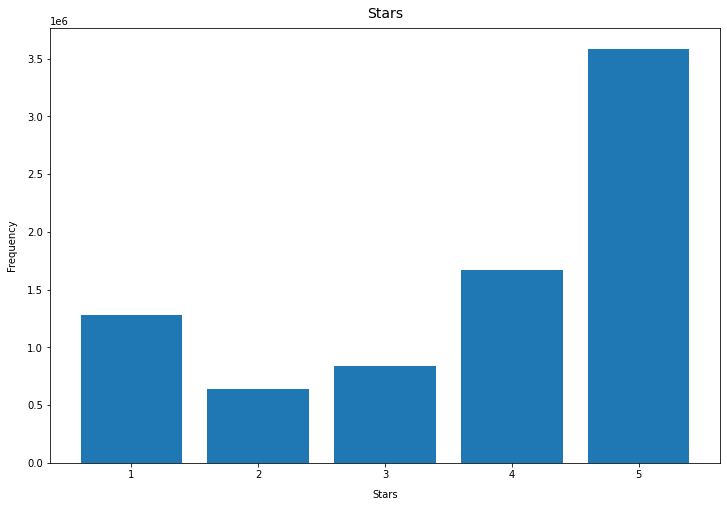

In [ ]:
star_counts = Counter(df_reviews.stars)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sorted(list(star_counts.keys())), 
       [star_counts[k] for k in sorted(list(star_counts.keys()))])
ax.set_xlabel('Stars', labelpad=10)
ax.set_xticks(range(1, 6))
ax.set_xticklabels([i for i in range(1,6)])
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Stars', size=14, pad=10)
plt.show()

## Distribution of Useful Reviews

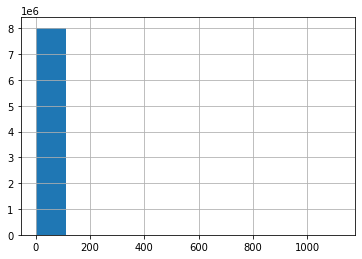

In [102]:
df_reviews.useful.hist()
plt.show()

* In the above histogram, we see that reviews with useful counts less than 100 almost accounts for the whole dataset.
* This is an expected outcome since most customers do not vote for useful reviews and only a small portion of all reviews can have the highest number of votes.
* In order to overcome the issue, extremely positively-skewed distribution, we will first determine the standard deviation of the useful reviews, then take all useful reviews above 1 standard deviation of 0.
* Secondly, we will use bins to convert the feature into a categorical feature.


In [103]:
std_useful = df_reviews.useful.values.std()
print('Standard deviation of useful reviews is {}'.format(std_useful))

Standard deviation of useful reviews is 3.5508303694259835


## Example of Most Useful, Funniest and Coolest Reviews

In [ ]:
most_useful = df_reviews.loc[df_reviews.useful == df_reviews.useful.max(),
                             'text'].values[0]
print('The most useful review is:')
print('='*79, end='\n\n')
print(most_useful)

The most useful review is:

In retrospect, I should have known better than to step foot into Amy's Baking Company (a.k.a. ABC Bistro).  

-8 pm on a Saturday night, three tables are occupied
-a sign on the door indicates they're looking for an experienced line cook, a dishwasher, waitresses, you name it
-Pita Jungle, just a stone's throw away, is packed to the gills

These are all bad signs.  They go ignored, however, because I'd eaten one thing all day, and I had drove here to try their pizza.  Never, ever again.

The waitress brings me out a water and a menu to my table for one  on the patio, which I had all to myself.  Browsing the apps, I was pleasantly surprised to see several things priced $3, which seemed like a bargain, given the high price of everything else.  $3 tapanade sounded like a good deal, but I was informed that it didn't come with anything - it was $3 extra for bread.  Since I was solo, I decided to skip it and instead pay $14 for their 12" margherita pizza.  

About

In [ ]:
funniest = df_reviews.loc[df_reviews.funny == df_reviews.funny.max(),
                             'text'].values[0]
print('The funniest review is:')
print('='*79, end='\n\n')
print(funniest)

The funniest review is:

I refuse to judge a place before I try it and you should too!

Like many of you, I watched the season finale of Kitchen Nightmares.  Working in a family business myself and knowing it is never easy, I wondered if owners Amy and Samy could possibly be like they were portrayed on the show or if there was some fancy editing done on the show.  Knowing that reality TV is usually far from reality, off we went last Saturday night for dinner at Amy's Baking Company.

I called the Monday before our planned dinner and made reservations for four.  I spoke with Samy and he kindly took my reservation even though he told me we didn't need to make one.  Plans changed and by Saturday night our group had grown to seven but I was reluctant to call and advise them of the change.  I was a little nervous....would they be mad?  Would Samy yell at me?  Silly questions, I know but legitimate ones after watching the show.   He really is a nice guy and I was silly to think otherwise.  M

In [ ]:
coolest = df_reviews.loc[df_reviews.cool == df_reviews.cool.max(),
                             'text'].values[0]
print('The coolest review is:')
print('='*79, end='\n\n')
print(coolest)

The coolest review is:

In retrospect, I should have known better than to step foot into Amy's Baking Company (a.k.a. ABC Bistro).  

-8 pm on a Saturday night, three tables are occupied
-a sign on the door indicates they're looking for an experienced line cook, a dishwasher, waitresses, you name it
-Pita Jungle, just a stone's throw away, is packed to the gills

These are all bad signs.  They go ignored, however, because I'd eaten one thing all day, and I had drove here to try their pizza.  Never, ever again.

The waitress brings me out a water and a menu to my table for one  on the patio, which I had all to myself.  Browsing the apps, I was pleasantly surprised to see several things priced $3, which seemed like a bargain, given the high price of everything else.  $3 tapanade sounded like a good deal, but I was informed that it didn't come with anything - it was $3 extra for bread.  Since I was solo, I decided to skip it and instead pay $14 for their 12" margherita pizza.  

About thr

# Lexical Analysis of Reviews

In [24]:
df_sample = df_reviews.sample(frac=0.001)
df_sample.reset_index(drop=True, inplace=True)
df_sample = df_sample.loc[:, ['review_id', 'text']]
display(df_sample.head())
print(df_sample.shape)

,review_id,text
0,t77Jis_u4WP-88JrduUydQ,these are the best chicken wings I've had. No...
1,VyDN6eyaL4vTWLL0Hud89g,"Tucked away in a lesser-visited area for food,..."
2,Br65dKnhYlCesa8kJcdIew,Awesome pool hall!\n\nThe manfriend and I made...
3,7VdWJy1Pfd5ifnLKoWqoYQ,"I like this store, it hit just the right note ..."
4,kvaR-XtPcWvxWeZkFmer6w,The best part about this hotel: Lazy River Poo...


(8021, 2)


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df_sample['#_of_sentence'] = df_sample.text.apply(lambda x : len(nltk.sent_tokenize(x)))
df_sample['#_of_words'] = df_sample.text.apply(lambda x : len(nltk.word_tokenize(x.lower())))
df_sample['#_of_vocabulary'] = df_sample.text.apply(lambda x : len(set(nltk.word_tokenize(x.lower()))))
df_sample['lexical_diversity'] = df_sample['#_of_words'] / df_sample['#_of_vocabulary']
df_sample['#_of_average_words'] = df_sample['#_of_words'] / df_sample['#_of_sentence']

In [28]:
# most common 15 words
Counter(nltk.word_tokenize(' '.join(df_sample.text.values))).most_common(15)

[('.', 52900),
 ('the', 35860),
 ('and', 29828),
 (',', 28956),
 ('I', 26041),
 ('a', 21777),
 ('to', 21567),
 ('was', 16366),
 ('of', 12272),
 ('!', 11836),
 ('is', 10947),
 ('it', 10350),
 ('for', 10204),
 ('in', 9387),
 ('The', 7563)]

In [27]:
df_sample.head()

,review_id,text,#_of_sentence,#_of_words,#_of_vocabulary,lexical_diversity
0,t77Jis_u4WP-88JrduUydQ,these are the best chicken wings I've had. No...,12,145,83,1.746988
1,VyDN6eyaL4vTWLL0Hud89g,"Tucked away in a lesser-visited area for food,...",24,424,200,2.120000
2,Br65dKnhYlCesa8kJcdIew,Awesome pool hall!\n\nThe manfriend and I made...,16,304,161,1.888199
3,7VdWJy1Pfd5ifnLKoWqoYQ,"I like this store, it hit just the right note ...",4,90,65,1.384615
4,kvaR-XtPcWvxWeZkFmer6w,The best part about this hotel: Lazy River Poo...,11,196,120,1.633333


In [ ]:
# remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
Counter(nltk.)